In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load file: SiNGMR

In [2]:
data_folder = 'SiNGMR'
# Gray
Gray_file = f'{data_folder}/ResultGrayMi.csv'
df_gray = pd.read_csv(Gray_file)

#Red
Red_file = f'{data_folder}/ResultRedMi.csv'
df_red = pd.read_csv(Red_file)

#Green
Green_file = f'{data_folder}/ResultGreenMi.csv'
df_green = pd.read_csv(Green_file)

#Blue
Blue_file = f'{data_folder}/ResultBlueMi.csv'
df_blue = pd.read_csv(Blue_file)

### Create a new row with column names

In [3]:
def create_columns_name(df):
    # Create a new row with numerical column names
    column_names = ['time'] + [f'sensor_{i}' for i in range(1, len(df.columns))]
    df_processed = pd.DataFrame([column_names] + df.values.tolist())

    # Update the column names of the DataFrame
    df_processed.columns = df_processed.iloc[0]

    # Remove the first row (numerical column names)
    df_processed = df_processed.iloc[1:]

    return df_processed


# Process each DataFrame individually
df_gray = create_columns_name(df_gray)
df_red = create_columns_name(df_red)
df_green = create_columns_name(df_green)
df_blue = create_columns_name(df_blue)

In [4]:
df_blue

0           time  sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  sensor_6   
1       1.484734  0.212366   0.02552 -0.126978  -0.26378 -0.212369  0.031019  \
2       2.480963  0.117244  0.279535  -0.32271   0.32694  -0.10932  0.032239   
3        3.48214 -0.037024  0.199821 -0.041612 -0.024637 -0.081271  0.183458   
4       4.483918   0.22761 -0.080964  0.047412 -0.103162 -0.037978  0.164556   
5        4.98373  0.016025  0.269422 -0.283076   0.24901 -0.242247  0.002361   
...          ...       ...       ...       ...       ...       ...       ...   
3061  796.672891  0.770903  0.882153  1.021802  1.342407  1.197387   0.77858   
3062  796.672891  0.770903  0.882153  1.021802  1.342407  1.197387   0.77858   
3063  796.672891  0.770903  0.882153  1.021802  1.342407  1.197387   0.77858   
3064  796.672891  0.770903  0.882153  1.021802  1.342407  1.197387   0.77858   
3065  796.672891  0.770903  0.882153  1.021802  1.342407  1.197387   0.77858   

0     sensor_7  sensor_8  sensor_9  ... sensor_54 sensor_55 sensor_56   
1    -0.021201  0.128583  0.174919  ... -0.568258 -0.053829  0.009286  \
2    -0.032787  0.076898 -0.337277  ... -0.173255 -0.134328  0.200924   
3    -0.010226  0.129744   0.00651  ...   0.18546  0.000025  0.072585   
4    -0.243762 -0.243659 -0.179321  ... -0.056063 -0.208591  0.002898   
5    -0.015104  0.143681 -0.195581  ... -0.186938 -0.003943 -0.102793   
...        ...       ...       ...  ...       ...       ...       ...   
3061  1.404408  0.434622  0.876428  ...  1.243758  0.955241  1.424501   
3062  1.404408  0.434622  0.876428  ...  1.243758  0.955241  1.424501   
3063  1.404408  0.434622  0.876428  ...  1.243758  0.955241  1.424501   
3064  1.404408  0.434622  0.876428  ...  1.243758  0.955241  1.424501   
3065  1.404408  0.434622  0.876428  ...  1.243758  0.955241  1.424501   

0    sensor_57 sensor_58 sensor_59 sensor_60 sensor_61 sensor_62 sensor_63  
1       -0.208   0.01042 -0.002775 -0.068468 -0.173576  0.189295 -0.171407  
2    -0.280562  0.134003  0.242289  0.042274 -0.266378 -0.187592  0.110823  
3    -0.222172  0.257019  0.112207 -0.020849 -0.193207  0.067344   -0.1174  
4    -0.104258   0.09262  0.173183 -0.070129 -0.253885 -0.029056 -0.300908  
5     0.091887 -0.028129 -0.026004  -0.12993  -0.25567   0.09696  0.094563  
...        ...       ...       ...       ...       ...       ...       ...  
3061  1.095288  1.084683  1.674344  1.699527  0.703878  1.471525   0.84253  
3062  1.095288  1.084683  1.674344  1.699527  0.703878  1.471525   0.84253  
3063  1.095288  1.084683  1.674344  1.699527  0.703878  1.471525   0.84253  
3064  1.095288  1.084683  1.674344  1.699527  0.703878  1.471525   0.84253  
3065  1.095288  1.084683  1.674344  1.699527  0.703878  1.471525   0.84253  

[3065 rows x 64 columns]

#

# Band Comparison 

### STD compare

In [5]:
# Compute standard deviation by columns (sensors) for each band
std_gray = np.std(df_gray.iloc[:, 1:], axis=0)
std_red = np.std(df_red.iloc[:, 1:], axis=0)
std_green = np.std(df_green.iloc[:, 1:], axis=0)
std_blue = np.std(df_blue.iloc[:, 1:], axis=0)

# Create a table of standard deviation values
sensors = df_gray.columns[1:]  # Exclude the first column (assuming it contains frame data)
result_table_STD = pd.DataFrame({'Sensor': sensors, 'Gray': std_gray, 'Red': std_red, 'Green': std_green,
                             'Blue': std_blue})

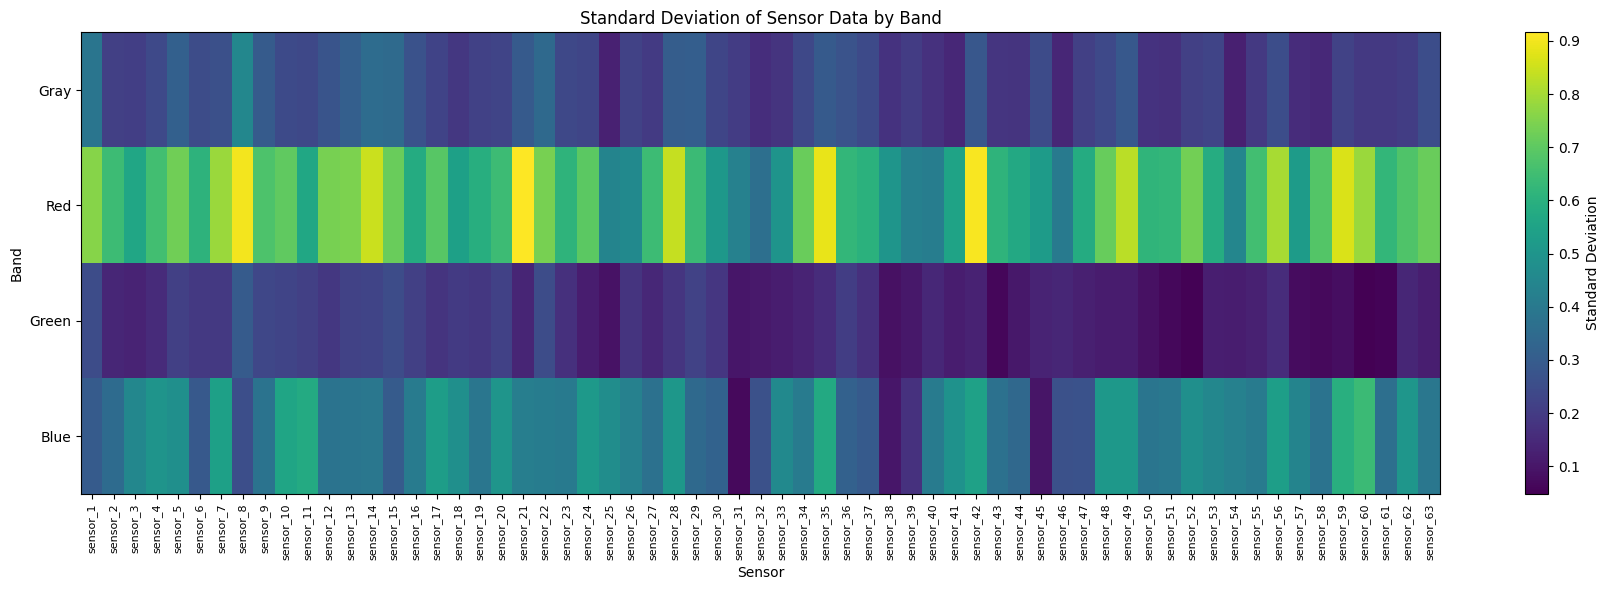

In [6]:
# Visualize the result as a heatmap
result_data = result_table_STD.set_index('Sensor').T
result_data = result_data.apply(pd.to_numeric)  # Convert values to numeric data types
fig, ax = plt.subplots(figsize=(18, 6))
heatmap = ax.imshow(result_data, cmap='viridis', aspect='auto')
plt.colorbar(heatmap, ax=ax, label='Standard Deviation')
ax.set_xticks(np.arange(len(sensors)))
ax.set_xticklabels(sensors, rotation=90, fontsize=8)
ax.set_yticks(np.arange(len(result_data.index)))
ax.set_yticklabels(result_data.index)
ax.set_xlabel('Sensor')
ax.set_ylabel('Band')
ax.set_title('Standard Deviation of Sensor Data by Band')
plt.tight_layout()
plt.show()

#### Most responsive sensors 

In [7]:
# Calculate the average std for each band
average_std = result_table_STD[['Gray', 'Red', 'Green', 'Blue']].mean(axis=1)

# Rank the sensors based on their average std values
ranked_sensors = average_std.sort_values(ascending=False)

# Get the top 10 most responsive sensors
top_10_sensors = ranked_sensors.index[:10]

# Print the result
print("\033[1;34mMost responsive sensor\033[0m:", top_10_sensors[0], "(Avg Std:", average_std[top_10_sensors[0]], ")")
print("\n\033[1;34mTop 10 most responsive sensors:\033[0m")
for i, sensor in enumerate(top_10_sensors[1:], start=2):
    suffix = "st" if i == 1 else "nd" if i == 2 else "rd" if i == 3 else "th"
    print(f"{i}{suffix}: {sensor} (Avg Std: {average_std[sensor]:.6f})")

Most responsive sensor: sensor_35 (Avg Std: 0.47829317313678077 )

Top 10 most responsive sensors:
2nd: sensor_8 (Avg Std: 0.476599)
3rd: sensor_42 (Avg Std: 0.467406)
4th: sensor_28 (Avg Std: 0.457686)
5th: sensor_14 (Avg Std: 0.454879)
6th: sensor_7 (Avg Std: 0.444452)
7th: sensor_21 (Avg Std: 0.442098)
8th: sensor_59 (Avg Std: 0.441078)
9th: sensor_22 (Avg Std: 0.436722)
10th: sensor_56 (Avg Std: 0.436565)


### Most suitable band

In [8]:
# Calculate the average std for each band
average_std = result_table_STD[['Gray', 'Red', 'Green', 'Blue']].mean(axis=0)

# Rank the bands based on their average std values
ranked_bands = average_std.sort_values(ascending=False)

# Print the result in blue color
print("\033[94mMost Suitable Band for Further Analysis:\033[0m")
for i, band in enumerate(ranked_bands.index):
    avg_std = average_std[band]
    print(f"{i+1}st: {band} (Avg Std: {avg_std:.4f})")

Most Suitable Band for Further Analysis:
1st: Red (Avg Std: 0.6455)
2st: Blue (Avg Std: 0.4052)
3st: Gray (Avg Std: 0.2342)
4st: Green (Avg Std: 0.1507)


#

### SNR comparison 

In [9]:
# Compute standard deviation by columns (sensors) for each band
std_gray = np.std(df_gray.iloc[:, 1:], axis=0)
std_red = np.std(df_red.iloc[:, 1:], axis=0)
std_green = np.std(df_green.iloc[:, 1:], axis=0)
std_blue = np.std(df_blue.iloc[:, 1:], axis=0)

# Compute mean by columns (sensors) for each band
mean_gray = np.mean(df_gray.iloc[:, 1:], axis=0)
mean_red = np.mean(df_red.iloc[:, 1:], axis=0)
mean_green = np.mean(df_green.iloc[:, 1:], axis=0)
mean_blue = np.mean(df_blue.iloc[:, 1:], axis=0)

# Compute SNR for each band
snr_gray = mean_gray / std_gray
snr_red = mean_red / std_red
snr_green = mean_green / std_green
snr_blue = mean_blue / std_blue



# Create a table of SNR values
sensors = df_gray.columns[1:]  # Exclude the first column (assuming it contains frame data)
result_table_SNR = pd.DataFrame({'Sensor': sensors, 'Gray': snr_gray, 'Red': snr_red, 'Green': snr_green,
                             'Blue': snr_blue})

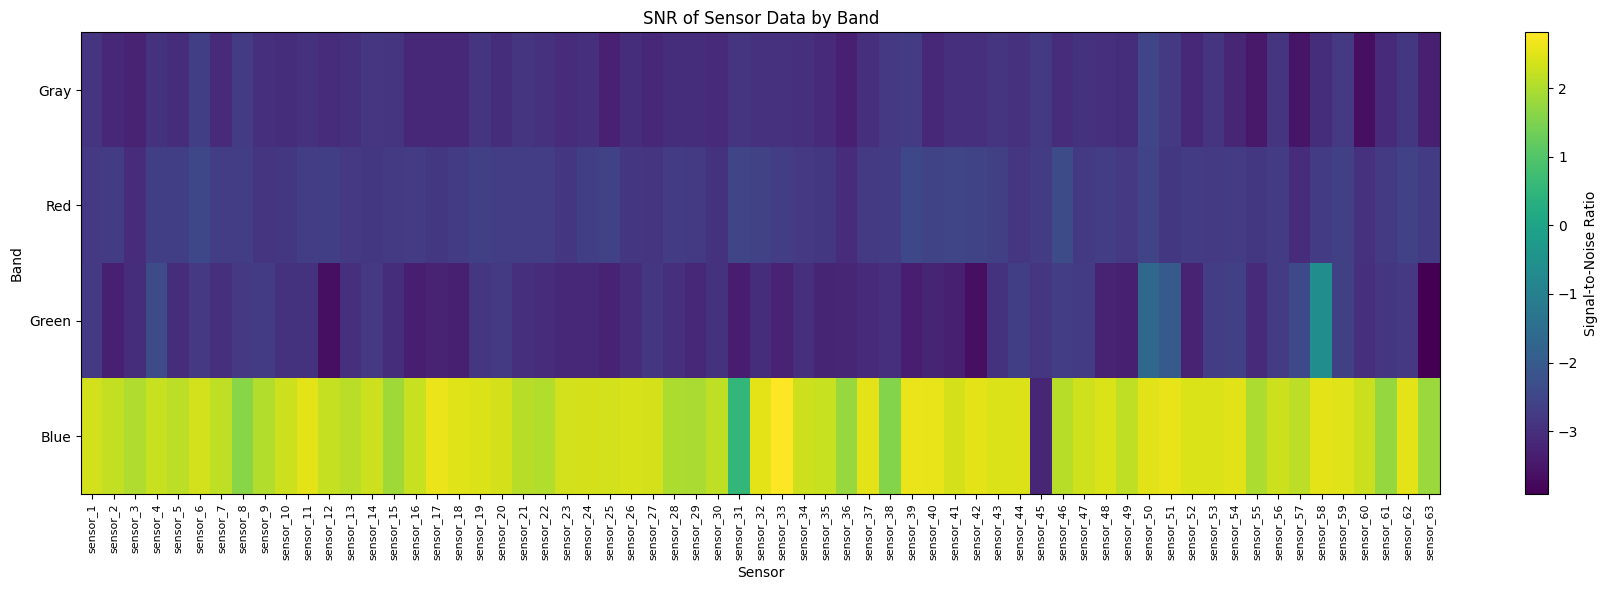

In [10]:
# Visualize the result as a heatmap
result_data = result_table_SNR.set_index('Sensor').T
result_data = result_data.apply(pd.to_numeric)  # Convert values to numeric data types
fig, ax = plt.subplots(figsize=(18, 6))
heatmap = ax.imshow(result_data, cmap='viridis', aspect='auto')
plt.colorbar(heatmap, ax=ax, label='Signal-to-Noise Ratio')
ax.set_xticks(np.arange(len(sensors)))
ax.set_xticklabels(sensors, rotation=90, fontsize=8)
ax.set_yticks(np.arange(len(result_data.index)))
ax.set_yticklabels(result_data.index)
ax.set_xlabel('Sensor')
ax.set_ylabel('Band')
ax.set_title('SNR of Sensor Data by Band')
plt.tight_layout()
plt.show()

In [11]:
# Calculate the average std for each band
average_SNR = result_table_SNR[['Gray', 'Red', 'Green', 'Blue']].mean(axis=0)

# Rank the bands based on their average std values
ranked_bands = average_SNR.sort_values(ascending=True)

# Print the result in blue color
print("\033[94mLess noisy:\033[0m")
for i, band in enumerate(ranked_bands.index):
    avg_std = average_std[band]
    print(f"{i+1}st: {band} (Avg SNR: {avg_std:.4f})")

Less noisy:
1st: Gray (Avg SNR: 0.2342)
2st: Green (Avg SNR: 0.1507)
3st: Red (Avg SNR: 0.6455)
4st: Blue (Avg SNR: 0.4052)


#

## Band Visualisation 

### plot Green band 

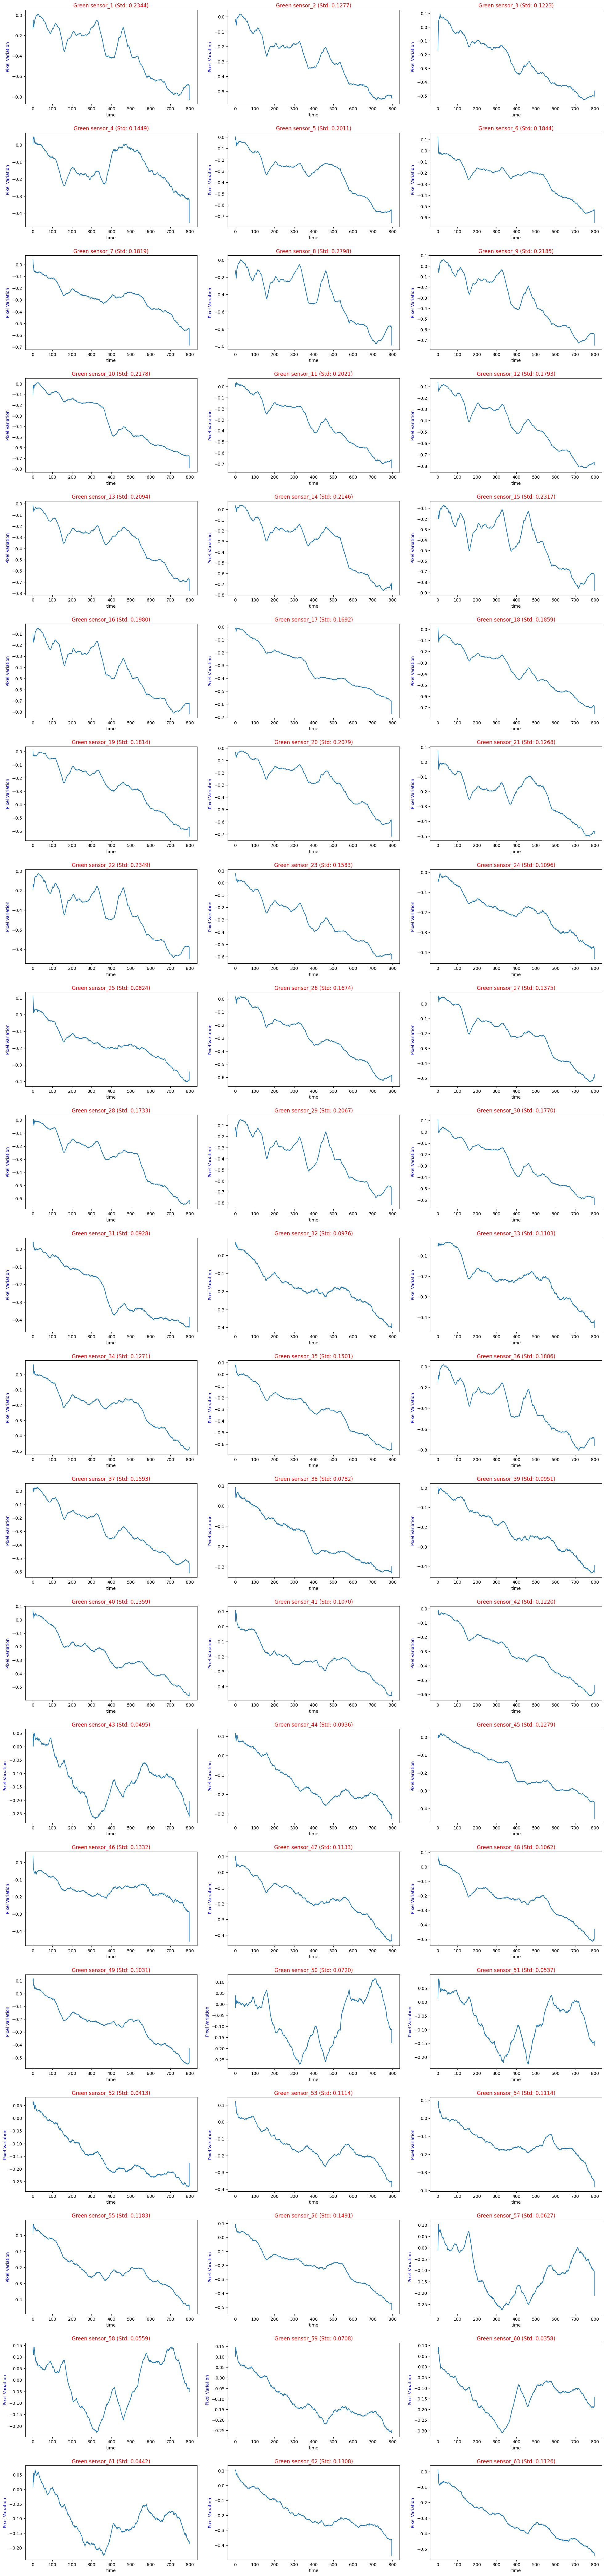

In [12]:
# Get the column names excluding the frame column
sensor_columns = df_green.columns[1:]

# Determine the number of subplots needed
num_subplots = len(sensor_columns)

# Set the layout of the subplots
subplot_rows = int((num_subplots + 2) / 3)  # Adjust the number of rows as needed
subplot_cols = min(3, num_subplots)  # Adjust the number of columns as needed

# Create subplots
fig, axes = plt.subplots(subplot_rows, subplot_cols, figsize=(20, 4 * subplot_rows))  # Adjust the figure size as needed

# Flatten the axes array if necessary
axes = axes.flatten()

# Apply moving average and plot the smoothed data
window_size = 50 # Adjust the window size as desired
for i, sensor in enumerate(sensor_columns):
    ax = axes[i] if num_subplots > 1 else axes
    filtered_data = df_green[sensor].rolling(window=window_size, min_periods=1).mean()
    ax.plot(df_green['time'], filtered_data) 
    std_value = np.std(df_green[sensor].rolling(window=window_size, min_periods=1).mean().iloc[window_size - 1:].values)
    ax.set_title(f"Green {sensor} (Std: {std_value:.4f})", color='red')
    ax.set_xlabel('time')
    ax.set_ylabel('Pixel Variation', color='blue')
    ax.margins(x=0.05)  # Add some margin to the x-axis


# Adjust the spacing between subplots
fig.tight_layout(pad=2.0)  # Increase the padding between subplots

# Show the plot
plt.show()

#

### Plot Gray band

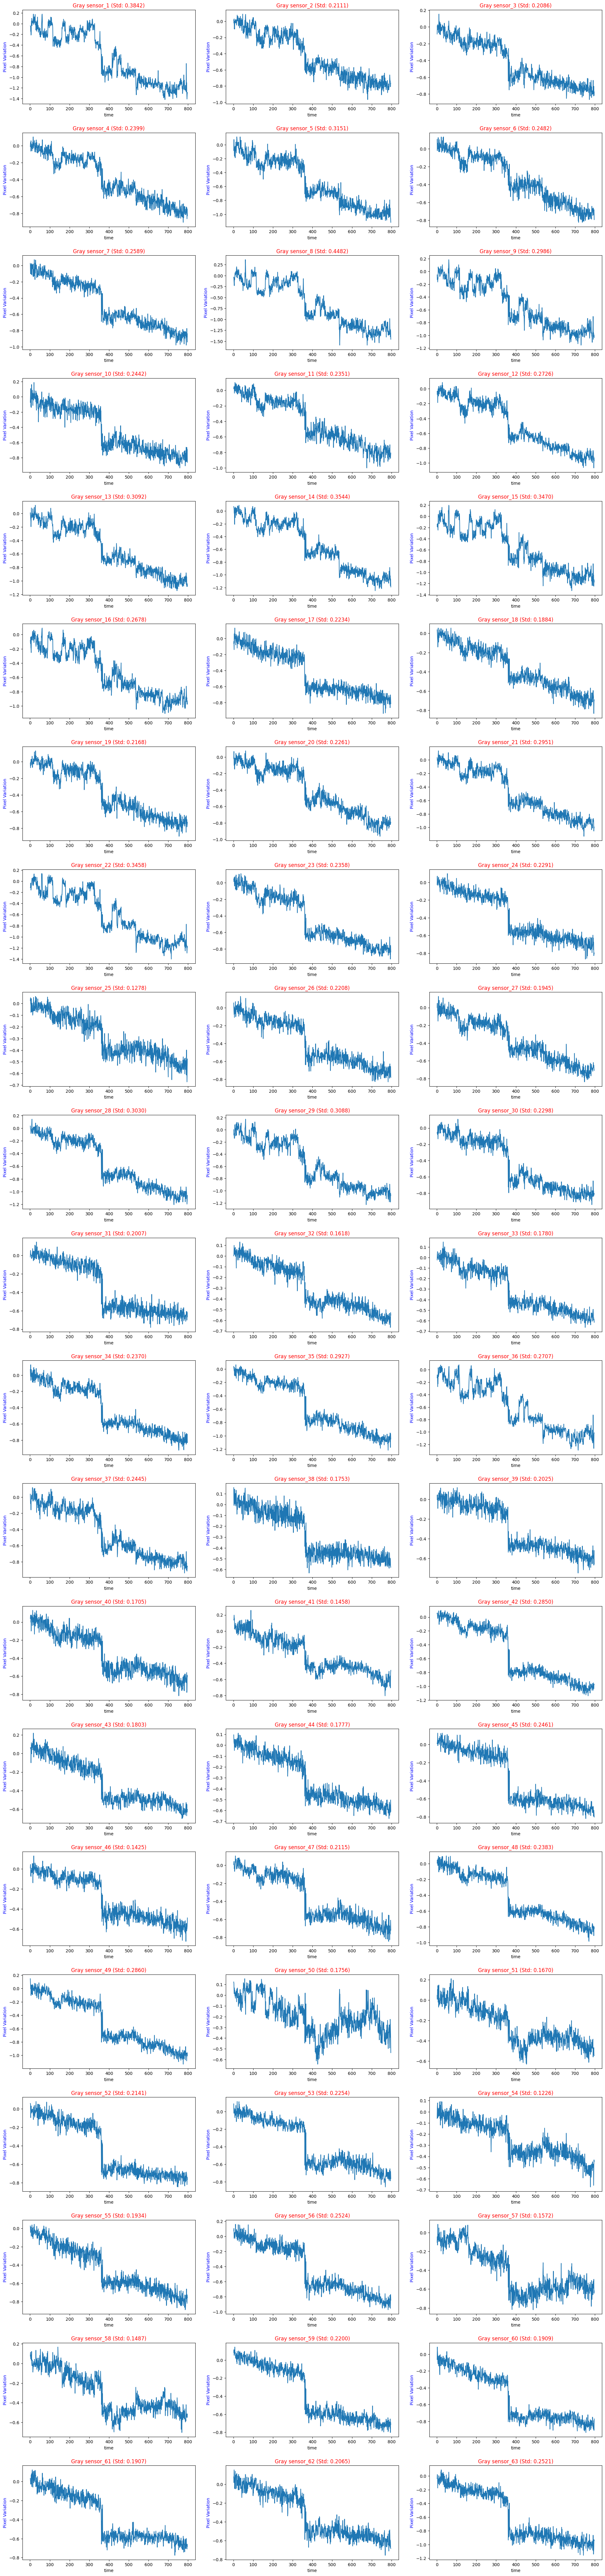

In [ ]:
# Get the column names excluding the frame column
df = df_gray
sensor_columns = df.columns[1:]

# Determine the number of subplots needed
num_subplots = len(sensor_columns)

# Set the layout of the subplots
subplot_rows = int((num_subplots + 2) / 3)  # Adjust the number of rows as needed
subplot_cols = min(3, num_subplots)  # Adjust the number of columns as needed

# Create subplots
fig, axes = plt.subplots(subplot_rows, subplot_cols, figsize=(20, 4 * subplot_rows))  # Adjust the figure size as needed

# Flatten the axes array if necessary
axes = axes.flatten()

# Plot the pixel variation for each sensor
for i, sensor in enumerate(sensor_columns):
    ax = axes[i] if num_subplots > 1 else axes
    ax.plot(df['time'], df[sensor])
    std_value = np.std(df[sensor].values)
    ax.set_title(f"Gray {sensor} (Std: {std_value:.4f})", color='red')
    ax.set_xlabel('time')
    ax.set_ylabel('Pixel Variation', color='blue')
    ax.margins(x=0.05)  # Add some margin to the x-axis

# Adjust the spacing between subplots
fig.tight_layout(pad=2.0)  # Increase the padding between subplots

# Show the plot
plt.show()

#

### plot Blue Band 

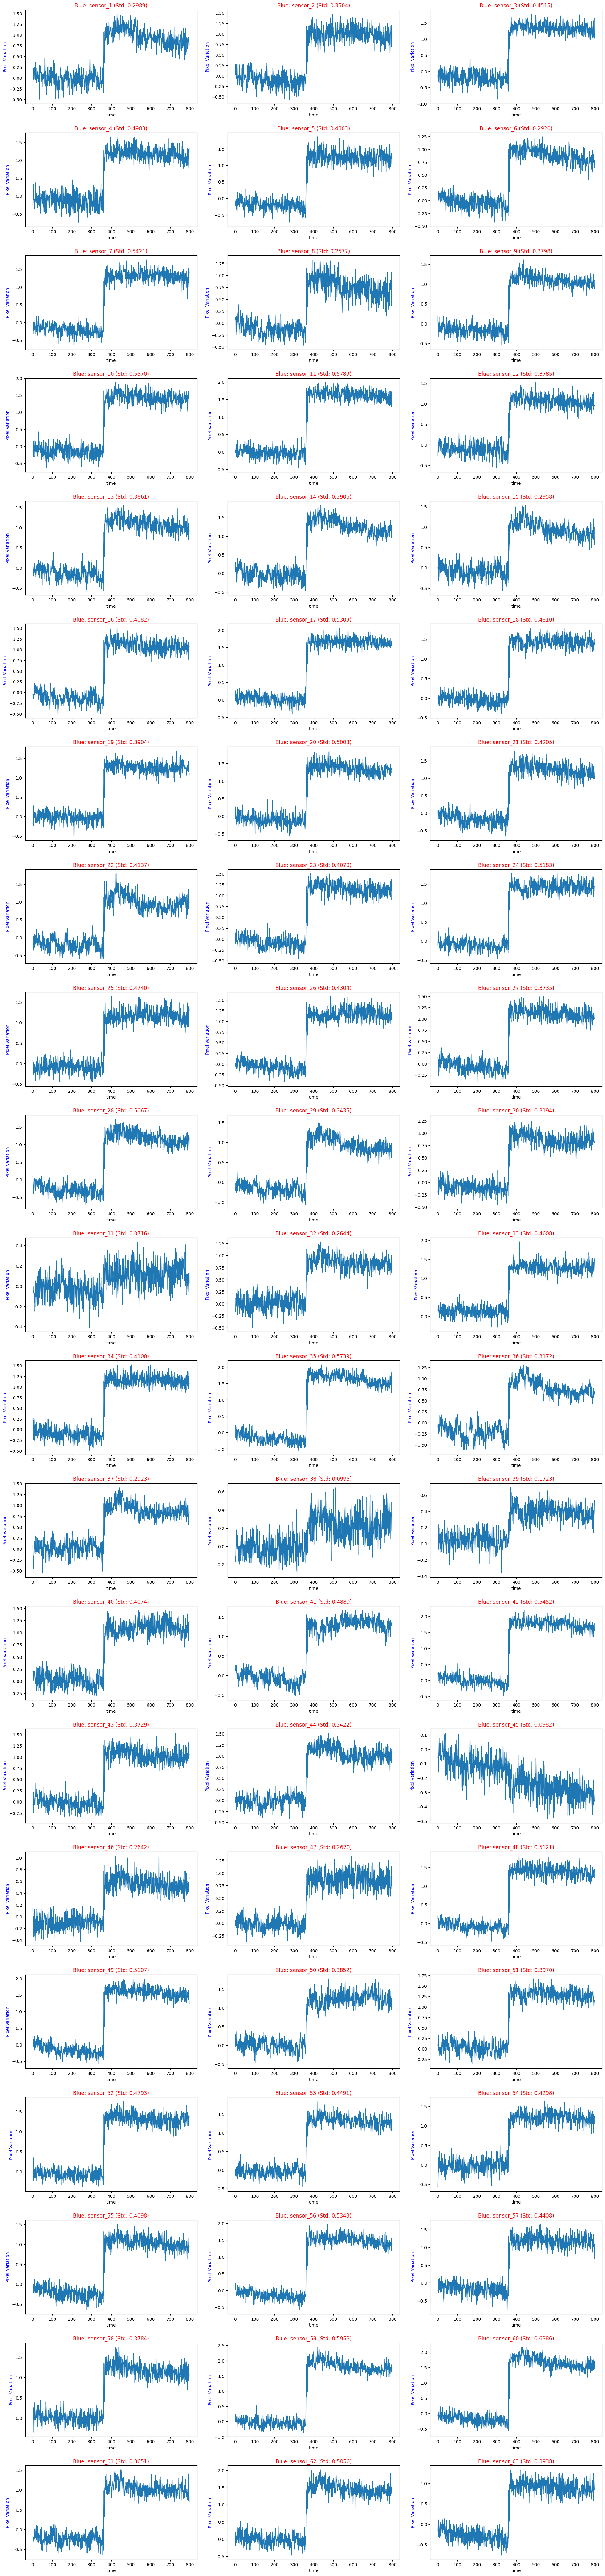

In [14]:
# Get the column names excluding the frame column
df = df_blue
sensor_columns = df.columns[1:]

# Determine the number of subplots needed
num_subplots = len(sensor_columns)

# Set the layout of the subplots
subplot_rows = int((num_subplots + 2) / 3)  # Adjust the number of rows as needed
subplot_cols = min(3, num_subplots)  # Adjust the number of columns as needed

# Create subplots
fig, axes = plt.subplots(subplot_rows, subplot_cols, figsize=(20, 4 * subplot_rows))  # Adjust the figure size as needed

# Flatten the axes array if necessary
axes = axes.flatten()

# Plot the pixel variation for each sensor
for i, sensor in enumerate(sensor_columns):
    ax = axes[i] if num_subplots > 1 else axes
    ax.plot(df['time'], df[sensor])
    std_value = np.std(df[sensor].values)
    ax.set_title(f"Blue: {sensor} (Std: {std_value:.4f})", color='red')
    ax.set_xlabel('time')
    ax.set_ylabel('Pixel Variation', color='blue')
    ax.margins(x=0.05)  # Add some margin to the x-axis

# Adjust the spacing between subplots
fig.tight_layout(pad=2.0)  # Increase the padding between subplots

# Show the plot
plt.show()